<a href="https://colab.research.google.com/github/Shreya-data/Bank-Churners/blob/main/EDA_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#to display more columns and more rows
pd.set_option("display.max_rows",1000)    
pd.set_option("display.max_columns",1000)

In [ ]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
dataset=pd.read_csv("/content/drive/MyDrive/BankChurners.csv")
dataset.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [ ]:
#drop the column which has not important
dataset.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [ ]:
#information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
#decriptive statistics on numerical features only
dataset.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [ ]:
#numerical features
num_col=dataset.describe().columns.values
num_col

array(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [ ]:
#replace function
dataset.replace({"Unknown":np.nan},inplace=True)

In [ ]:
#drop the unknown data(i.e.,NAN)
dataset.dropna(inplace=True)

In [ ]:
#decriptive statistics on categorical features only
dataset.describe(include="object")

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
#categorical features
cat_col=dataset.describe(include="object").columns.values
cat_col

array(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'], dtype=object)

# **EDA on Categorical features**

In [ ]:
#colors
Colors = ["#bd7ebe", "#ffee65", "#beb9db","#F2D2BD" ,'#66b3ff',"#32CD32",'#ff9999'
          ,"#ffcc99","#8BD3E6","#FF6D6A","g","b","y","c","r","m","#FFA500","#00FF00","#FFC0CB"]

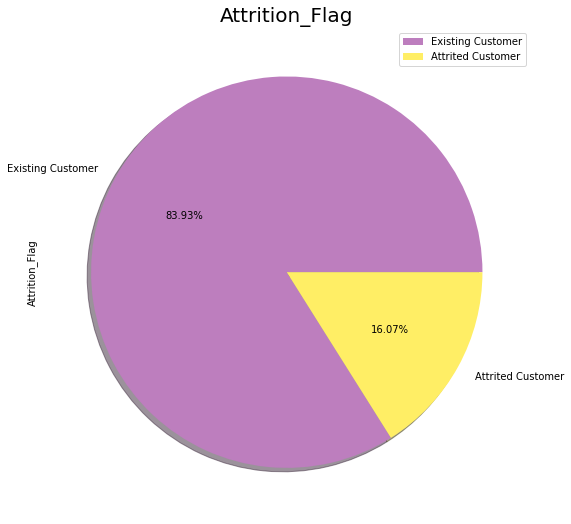

In [ ]:
#pie chart on Attrition Flag
dataset['Attrition_Flag'].value_counts().plot.pie(figsize=(15,9) , autopct = '%1.02f%%',shadow=True,colors=Colors)
plt.title('Attrition_Flag',size=20)
plt.legend()
plt.show()

Summary-1:

Attrited Customers in Bank are 16%

Existing Customers in Bank are 84%



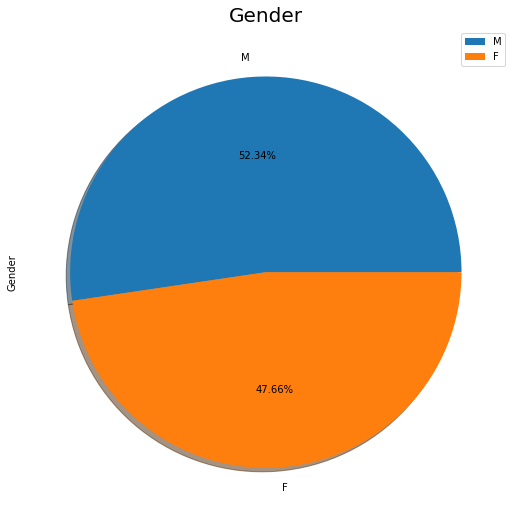

In [ ]:
#pie chart on Gender
dataset['Gender'].value_counts().plot.pie(figsize=(15,9) , autopct = '%1.02f%%',shadow=True)
plt.title('Gender',size=20)
plt.legend()
plt.show()

Summary-2:

Male Customers in Bank are 52.34%

Female Customers in Bank are 47.66%



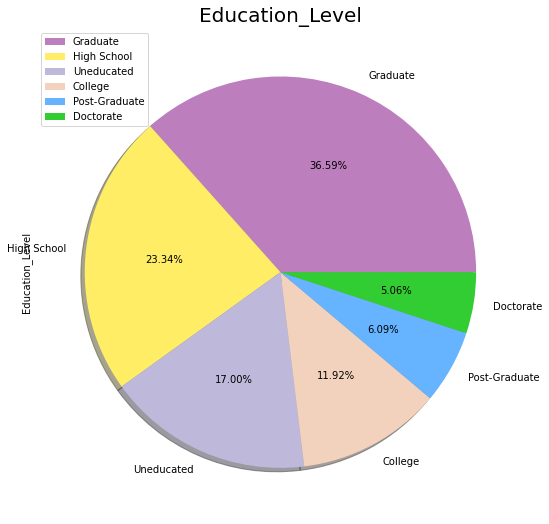

In [ ]:
#pie chart on Education Level
dataset['Education_Level'].value_counts().plot.pie(figsize=(15,9) , autopct = '%1.02f%%',shadow=True,colors=Colors)
plt.title('Education_Level',size=20)
plt.legend()
plt.show()

Summary-3:

Uneducated Customers in Bank are 17.00%

High School Customers in Bank are 23.34%

College Customers in Bank are 11.92%

Graduate Customers in Bank are 36.59%

Post Graduate Customers in Bank are 6.09%

Doctorate Customers in Bank are 5.06%


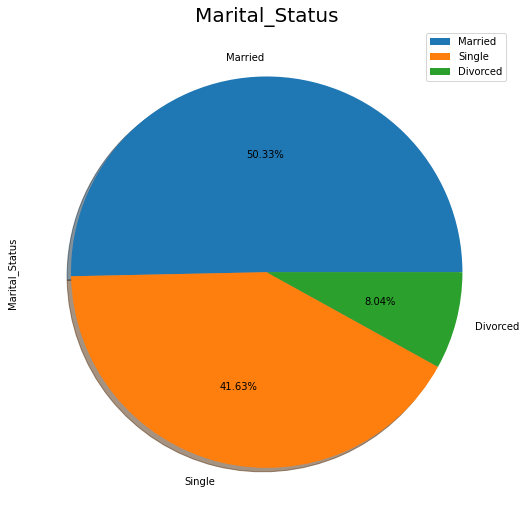

In [ ]:
#pie chart on Marital Status
dataset['Marital_Status'].value_counts().plot.pie(figsize=(15,9) , autopct = '%1.02f%%',shadow=True)
plt.title('Marital_Status',size=20)
plt.legend(loc=1)
plt.show()

Summary-4:

Married Customers in Bank are 50.33%

Single Customers in Bank are 41.63%

Divorced Customers in Bank are 8.04%

In [ ]:
dataset['Income_Category'].value_counts()

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

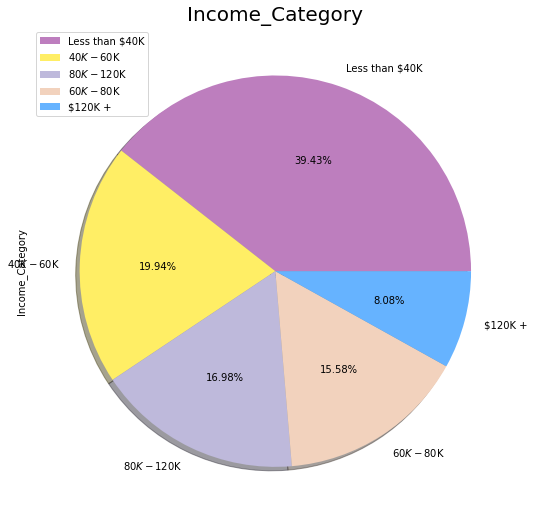

In [ ]:
#pie chart on Income Category
dataset['Income_Category'].value_counts().plot.pie(figsize=(15,9) , autopct = '%1.02f%%',shadow=True,colors=Colors)
plt.title('Income_Category',size=20)
plt.legend(loc=2)
plt.show()

Summary-5:
Customers whose income

Less than $40K in Bank are 39.43%

$40K - $60K  in Bank are 19.94%

$80K - $120K  in Bank are 16.98%

$60K - $80K  in Bank are 15.58%

$120K +  in Bank are 8.08%

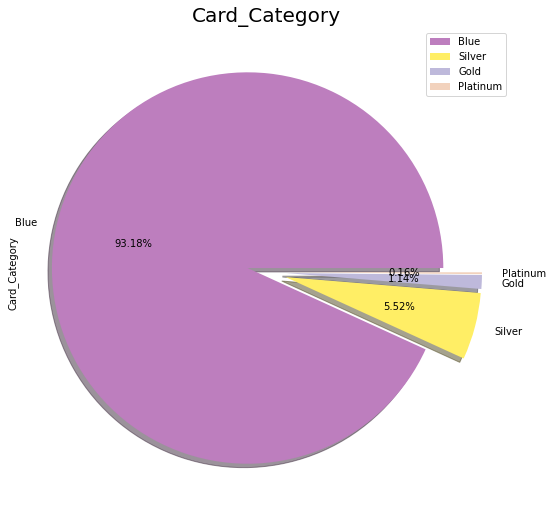

In [ ]:
#pie chart on Card Category
dataset['Card_Category'].value_counts().plot.pie(figsize=(15,9) , autopct = '%1.02f%%',shadow=True,colors=Colors,explode =(0.1,0.1,0.1,0.1))
plt.title('Card_Category',size=20)
plt.legend(loc=0)
plt.show()

Summary-6:

Blue card Customers in Bank are 93.18%

Silver card Customers in Bank are 5.52%

Gold Customers in Bank are 1.14%

Platinum Customers in Bank are 0.16%

# **EDA on Numerical Features**

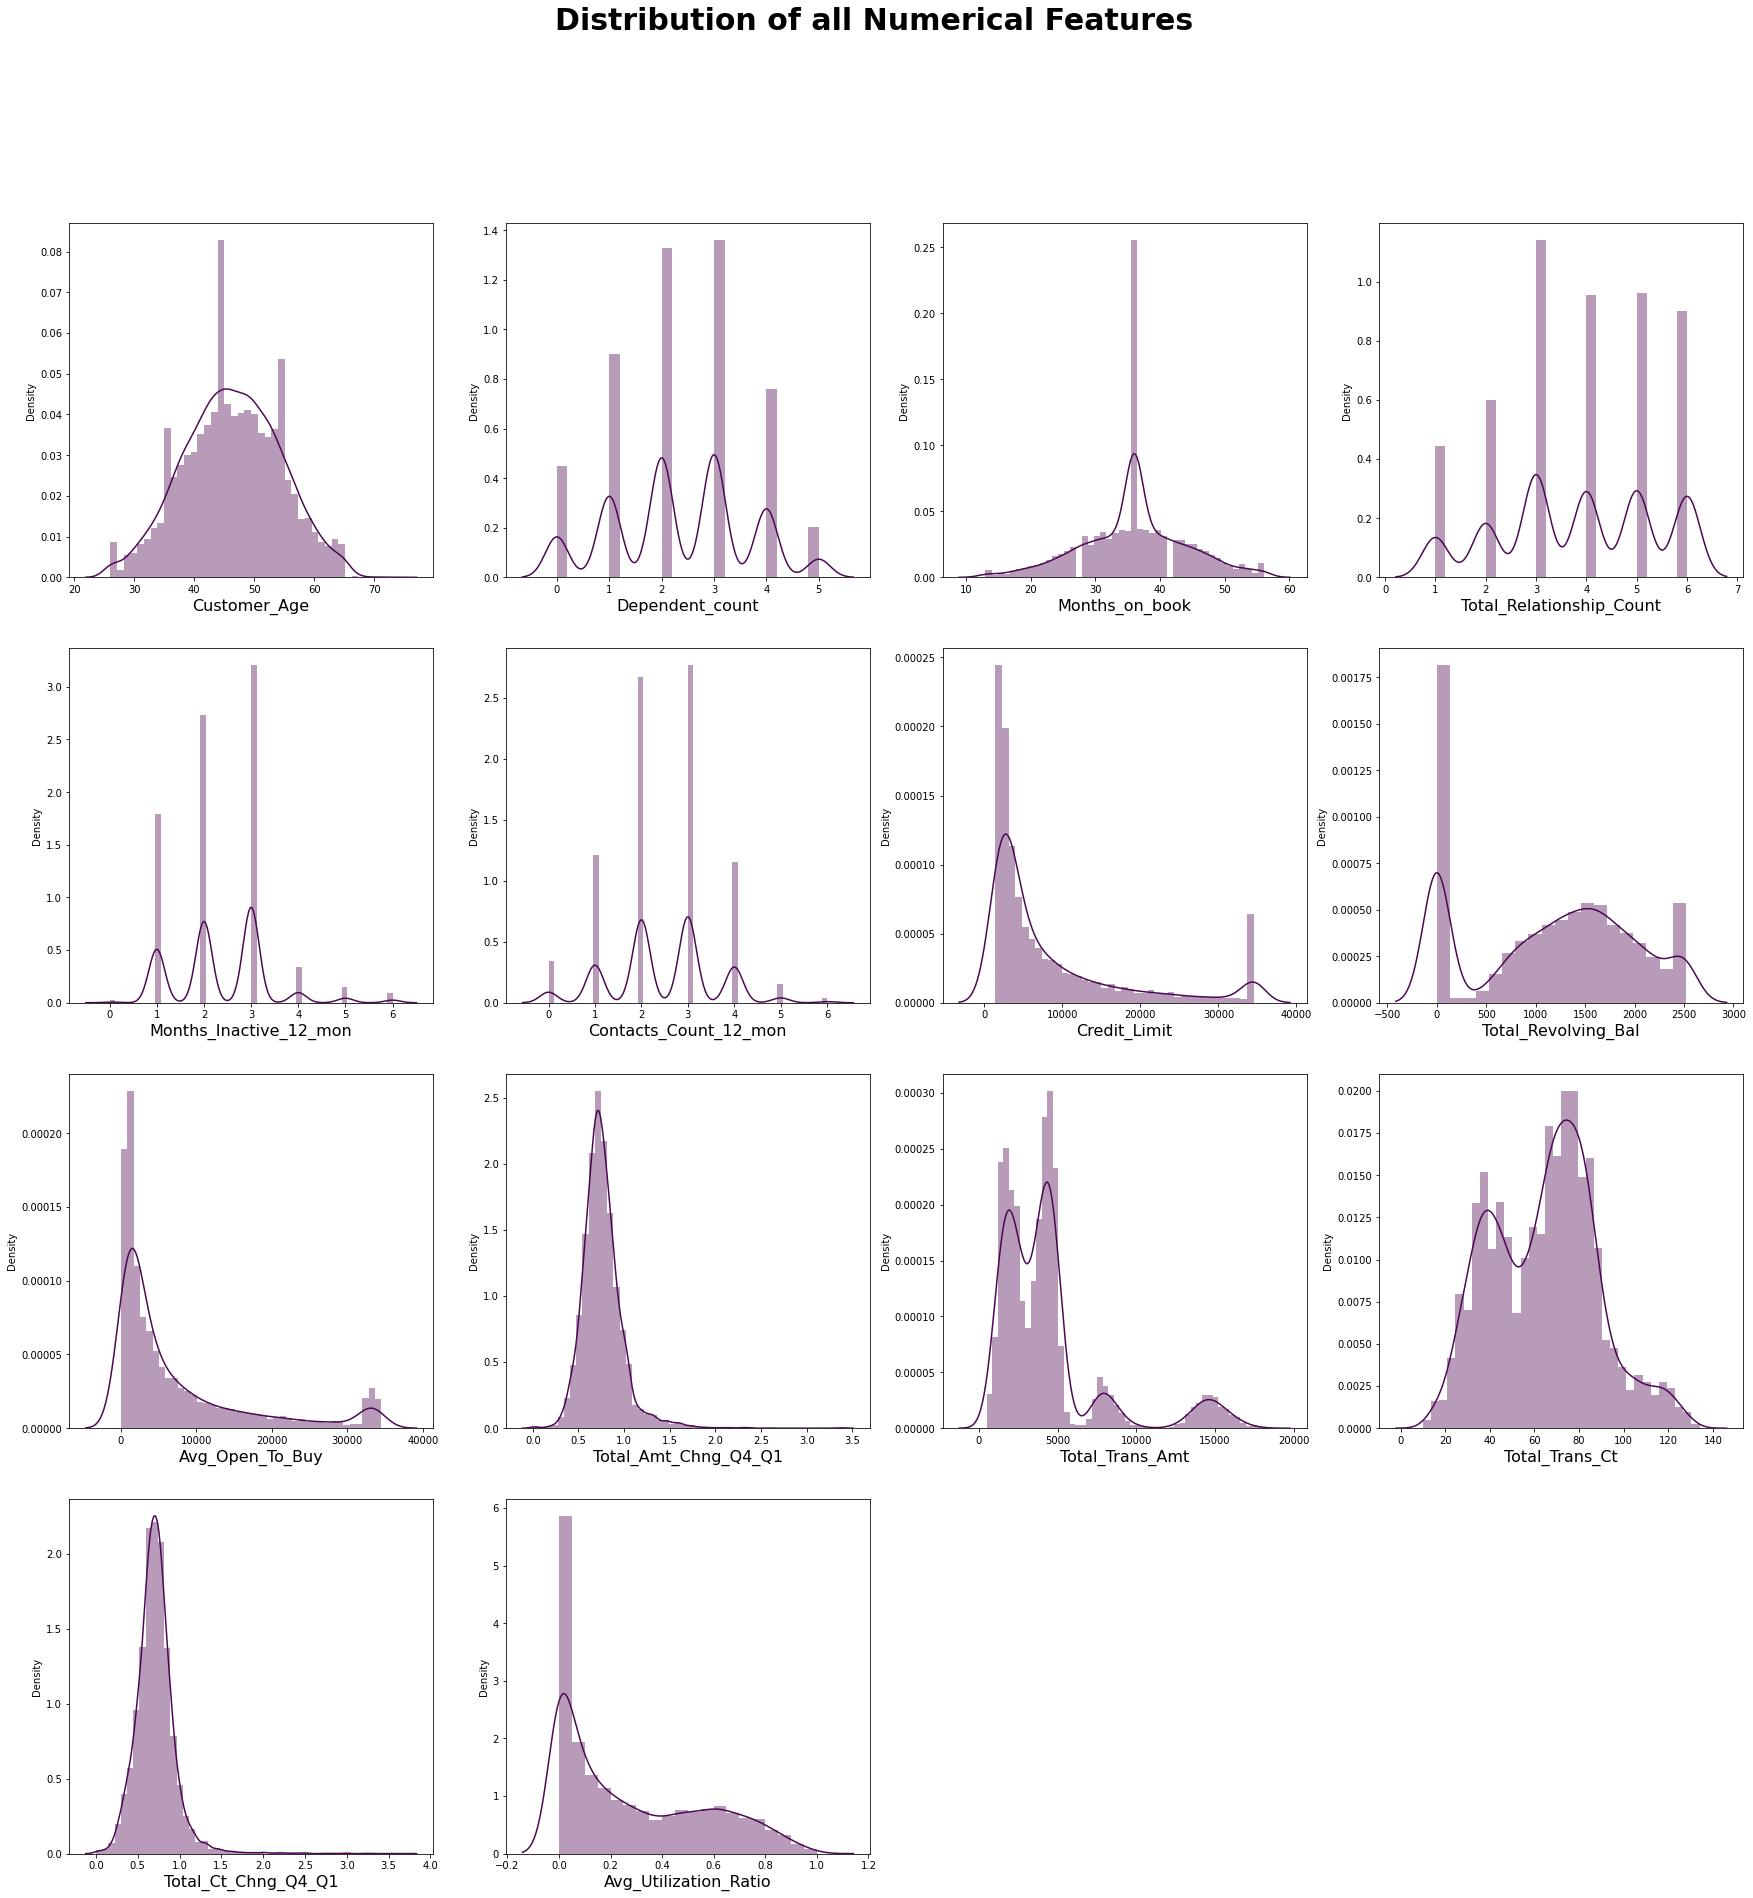

In [ ]:
#distribution plot on all numerical Features
plt.figure(figsize=(30,30))
for x,y in zip(range(1,len(num_col)+1),num_col):
    plt.subplot(4,4,x)
    sns.distplot(dataset[y],color="#4B0751")
    plt.xlabel(y,fontsize=16)
    plt.suptitle('Distribution of all Numerical Features ',fontsize=30,weight="bold")

from above all distributions, we see that most of the distributions are postively skewed.


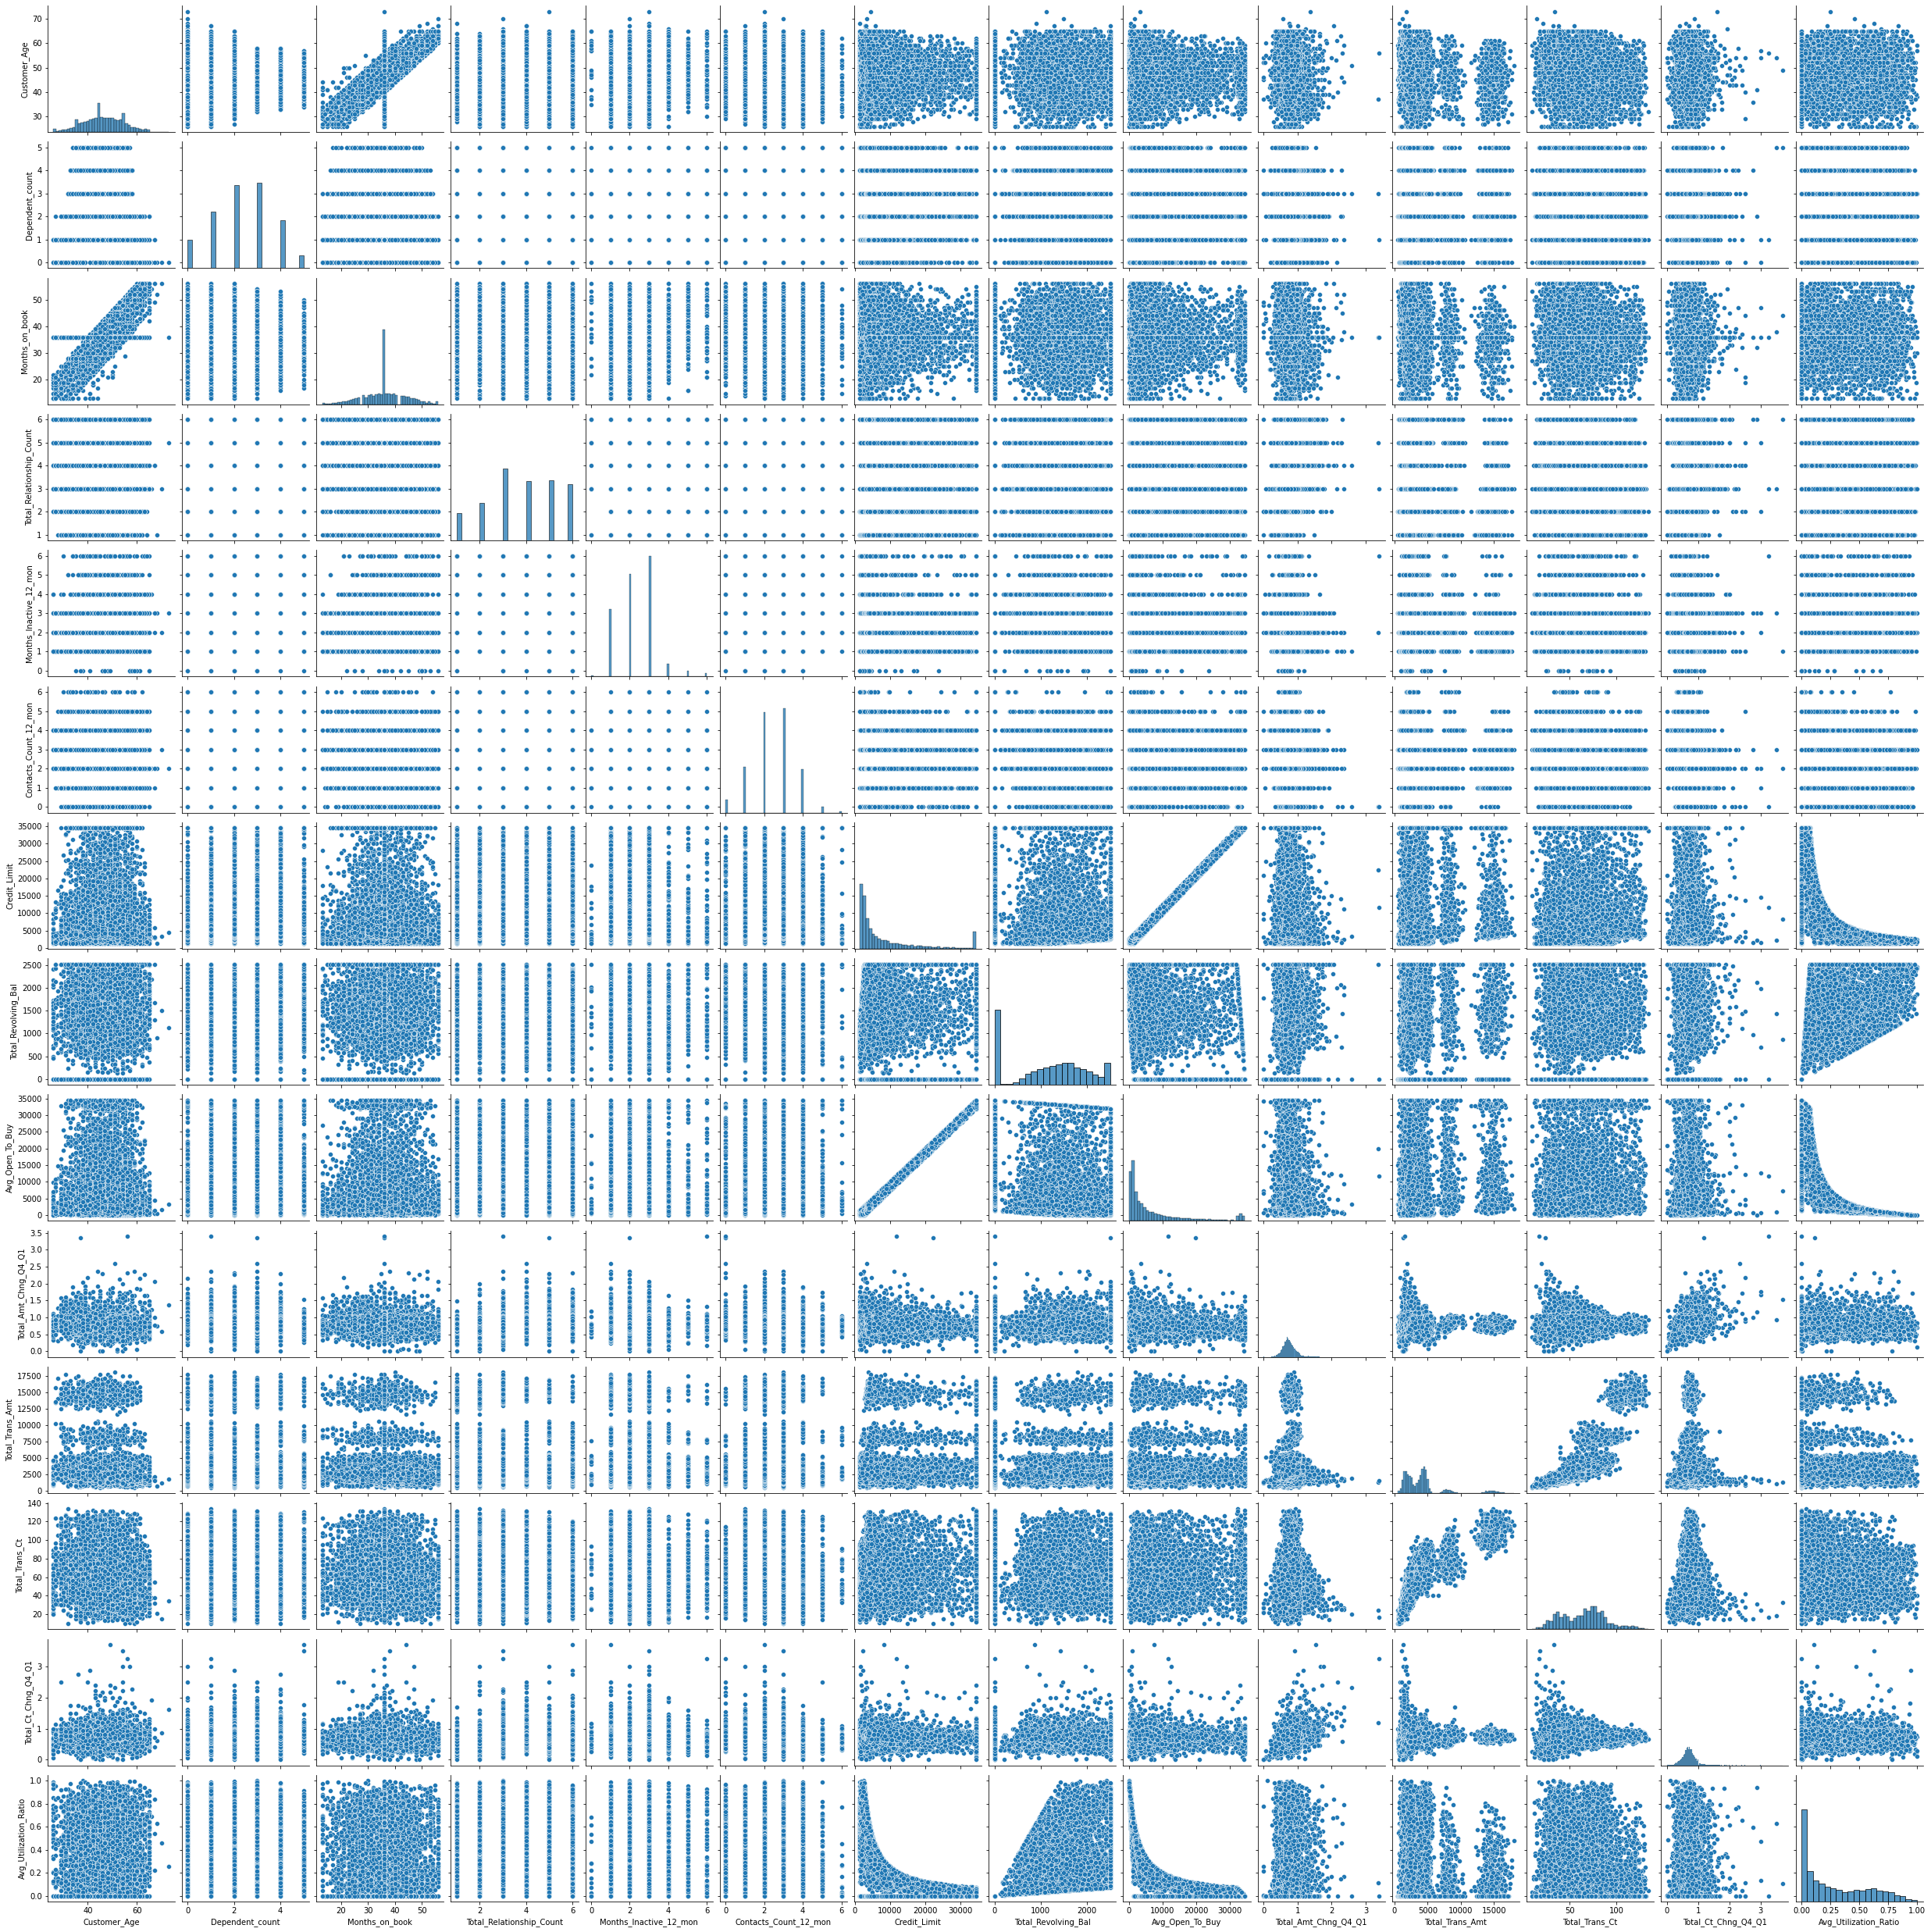

In [ ]:
#pairplot on all numerical variables
sns.pairplot(dataset[num_col])

from the above Pairplot, we see that there is strong positive correlation between "Credit Limit" and "Avg open to buy"

In [ ]:
dataset[["Credit_Limit","Avg_Open_To_Buy"]].corr()

Credit_Limit  Avg_Open_To_Buy
Credit_Limit         1.000000         0.996041
Avg_Open_To_Buy      0.996041         1.000000

i.e., Correlation between "Credit Limit" and "Avg open to buy" is approximately a prefect positive correlation

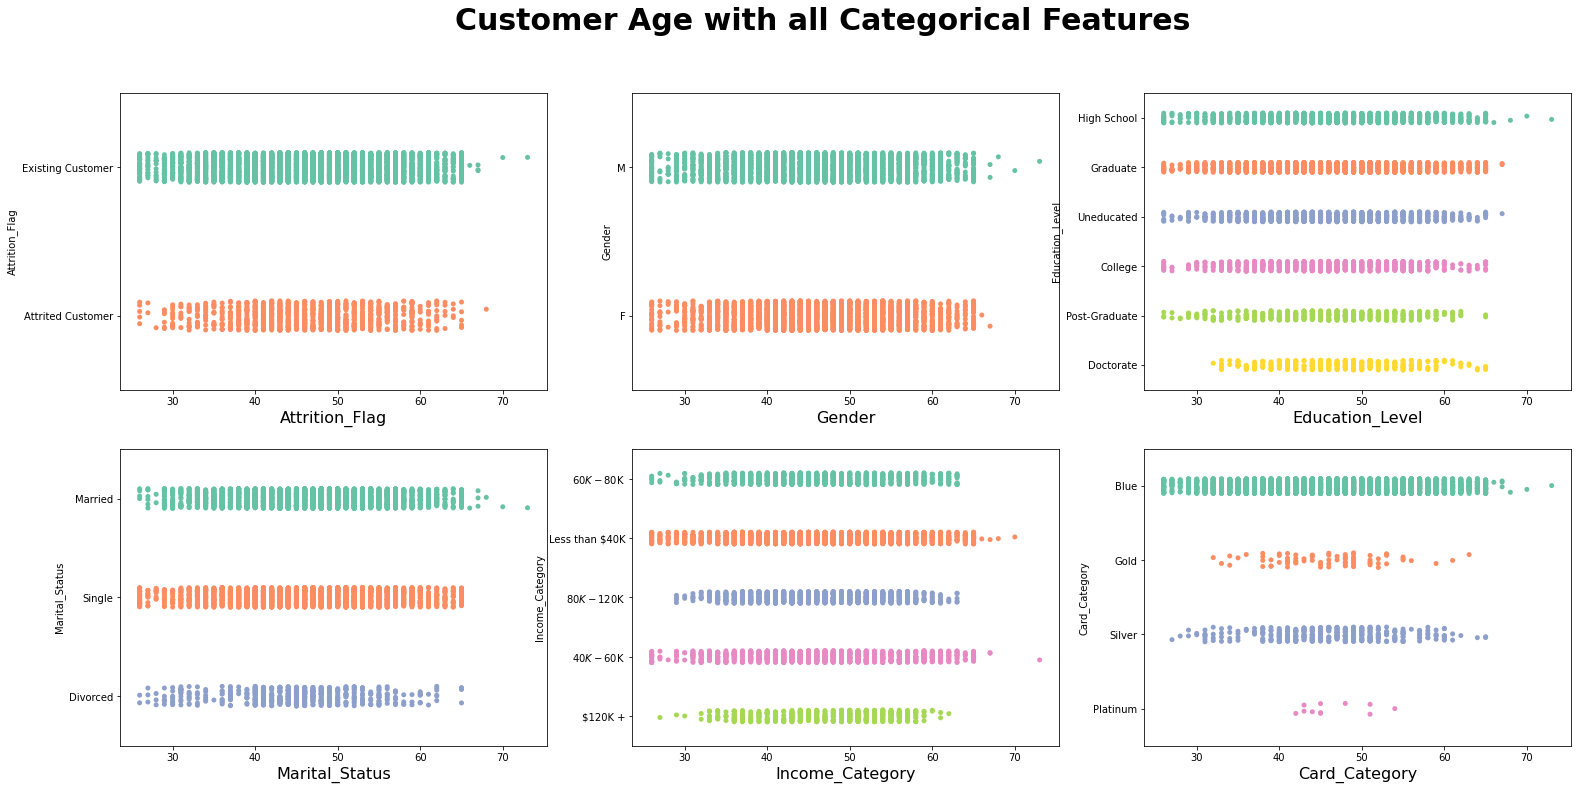

In [ ]:
#stripplot on Customer Age with respect to all categorical features
plt.figure(figsize=(26,12))
for x,y in zip(range(1,len(cat_col)+1),cat_col):
    plt.subplot(2,3,x)
    sns.stripplot('Customer_Age',y,data=dataset,palette="Set2")
    plt.xlabel(y,fontsize=16)
    plt.suptitle('Customer Age with all Categorical Features',fontsize=30,weight="bold")


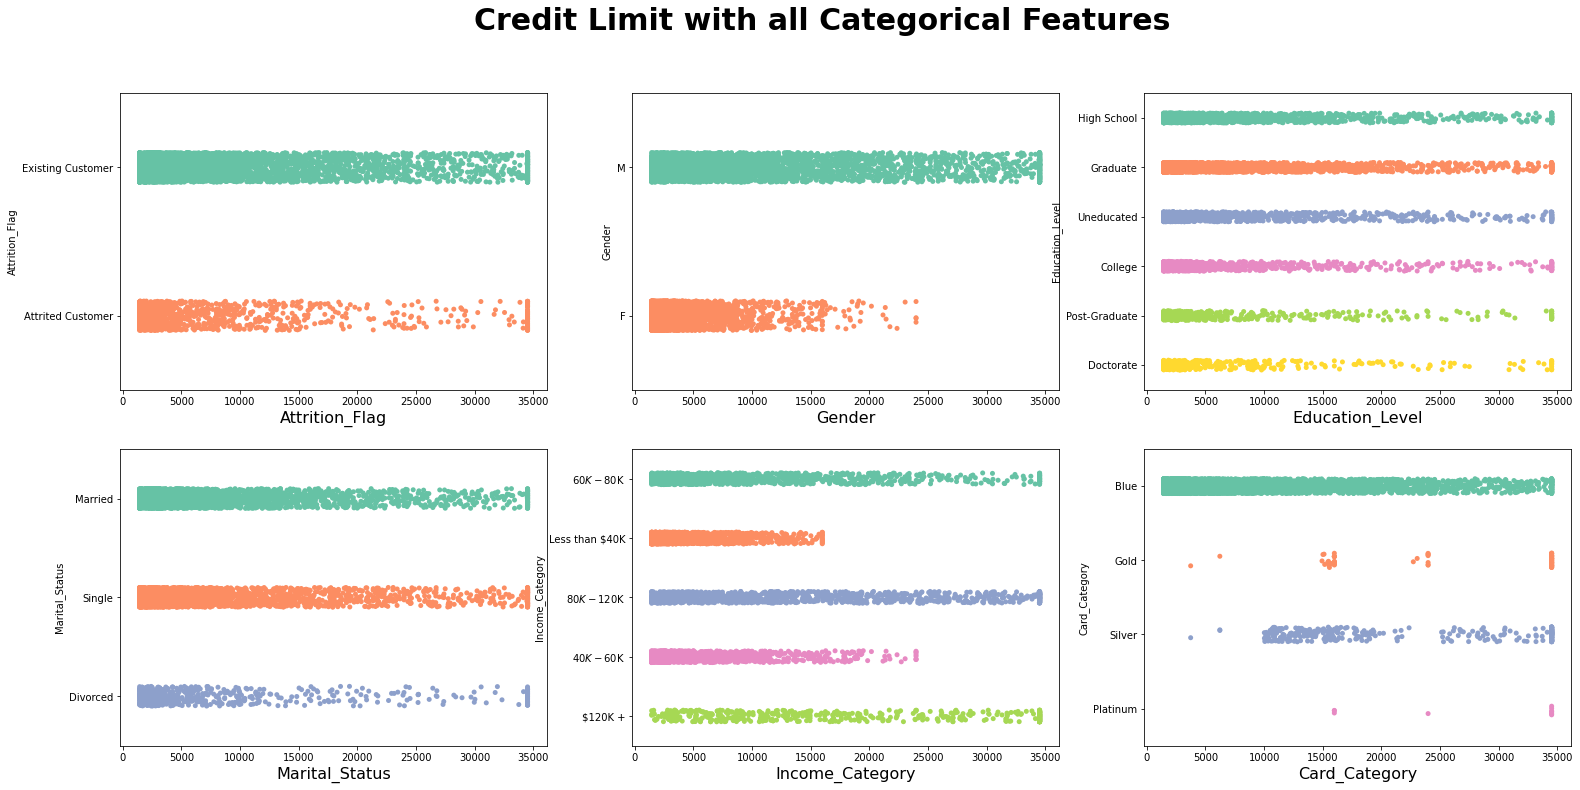

In [ ]:
#stripplot on Credit Limit with respect to all categorical features
plt.figure(figsize=(26,12))
for x,y in zip(range(1,len(cat_col)+1),cat_col):
    plt.subplot(2,3,x)
    sns.stripplot('Credit_Limit',y,data=dataset,palette="Set2")
    plt.xlabel(y,fontsize=16)
    plt.suptitle('Credit Limit with all Categorical Features',fontsize=30,weight="bold")


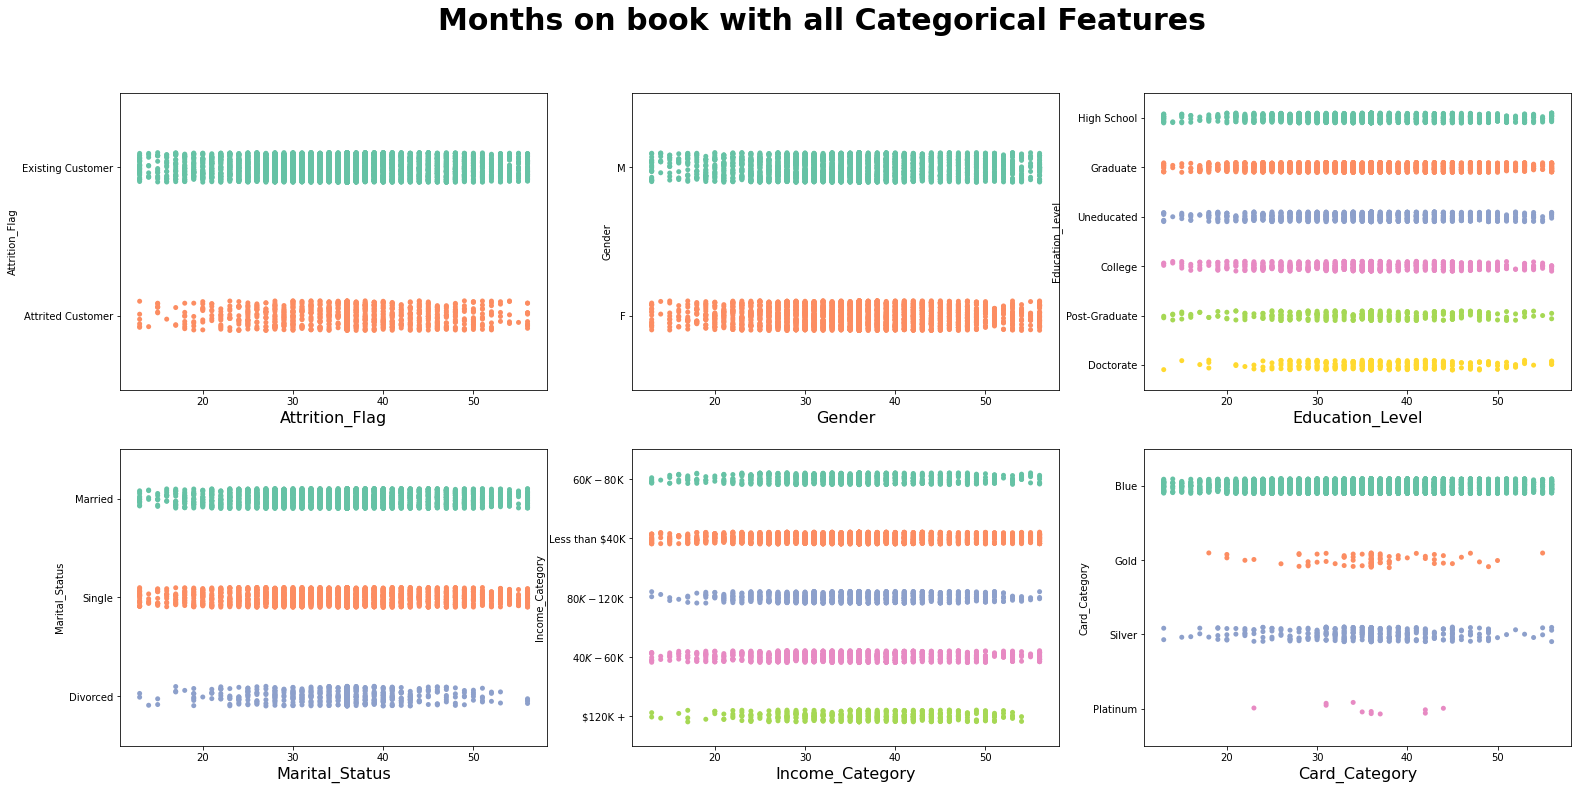

In [ ]:
#stripplot on Months ob Book with respect to all categorical features
plt.figure(figsize=(26,12))
for x,y in zip(range(1,len(cat_col)+1),cat_col):
    plt.subplot(2,3,x)
    sns.stripplot('Months_on_book',y,data=dataset,palette="Set2")
    plt.xlabel(y,fontsize=16)
    plt.suptitle('Months on book with all Categorical Features',fontsize=30,weight="bold")


# Data Preparation

In [ ]:
#label encoding 
dataset['class'] = dataset['Attrition_Flag'].apply(lambda x : 1 if x == "Attrited Customer" else 0)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(W):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = W.columns
    vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

    return(vif)

In [ ]:
#check Variance Inflation Factor(VIF)
calc_vif(dataset[[i for i in num_col]])

variables        VIF
0               Customer_Age  75.090540
1            Dependent_count   4.058599
2             Months_on_book  56.437261
3   Total_Relationship_Count   7.476147
4     Months_Inactive_12_mon   6.084906
5      Contacts_Count_12_mon   5.538823
6               Credit_Limit        inf
7        Total_Revolving_Bal        inf
8            Avg_Open_To_Buy        inf
9       Total_Amt_Chng_Q4_Q1  13.940730
10           Total_Trans_Amt   8.635042
11            Total_Trans_Ct  23.199897
12       Total_Ct_Chng_Q4_Q1  11.808382
13     Avg_Utilization_Ratio   5.760124

In [ ]:
calc_vif(dataset[[i for i in num_col if i not in ['Avg_Open_To_Buy']]])

variables        VIF
0               Customer_Age  75.090540
1            Dependent_count   4.058599
2             Months_on_book  56.437261
3   Total_Relationship_Count   7.476147
4     Months_Inactive_12_mon   6.084906
5      Contacts_Count_12_mon   5.538823
6               Credit_Limit   3.322550
7        Total_Revolving_Bal   6.758464
8       Total_Amt_Chng_Q4_Q1  13.940730
9            Total_Trans_Amt   8.635042
10            Total_Trans_Ct  23.199897
11       Total_Ct_Chng_Q4_Q1  11.808382
12     Avg_Utilization_Ratio   5.760124

In [ ]:
calc_vif(dataset[[i for i in num_col if i not in ['Avg_Open_To_Buy',"Customer_Age","Total_Trans_Ct","Total_Amt_Chng_Q4_Q1",
                                                  "Months_on_book","Total_Ct_Chng_Q4_Q1"]]])

variables       VIF
0           Dependent_count  3.758336
1  Total_Relationship_Count  5.505905
2    Months_Inactive_12_mon  5.162620
3     Contacts_Count_12_mon  4.906644
4              Credit_Limit  3.234150
5       Total_Revolving_Bal  6.701473
6           Total_Trans_Amt  2.577213
7     Avg_Utilization_Ratio  5.535483

In [ ]:
#numerical variable in which multicollinear is minimum
numerical_features=calc_vif(dataset[[i for i in num_col if i not in ['Avg_Open_To_Buy',"Customer_Age","Total_Trans_Ct","Total_Amt_Chng_Q4_Q1",
                                                  "Months_on_book","Total_Ct_Chng_Q4_Q1"]]]).variables.values
numerical_features                                                  

array(['Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'],
      dtype=object)

# Logistic Regression

In [ ]:
#define Dependent and independent features
X=dataset[numerical_features]    #independent features
y=dataset['class']               #dependent features

In [ ]:
#importing the statsmodel
import statsmodels.api as sm

In [ ]:
#fit logistic Regression
x=sm.add_constant(X)
log2=sm.Logit(y,x)
result=log2.fit()

Optimization terminated successfully.
         Current function value: 0.338198
         Iterations 7


In [ ]:
#summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10118
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                  0.2327
Time:                        03:19:44   Log-Likelihood:                -3424.9
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4439      0.172     -2.579      0.010      -0.781      -0.107
Dependent_count              0.0760      0.024      3.156      0.002       0.029       0.123
Total_Relationship_Count    -0.4672      0.022    -20.885      0.000      -0.511      -0.423
Months_Inactive_12_mon       0.3925      0.030     13.056      0.000       0.334       0.451
Contacts_Count_12_mon        0.5011      0.030     16.825      0.000       0.443       0.559
Credit_Limit             -5.662e-06   4.27e-06     -1.325      0.185    -1.4e-05    2.71e-06
Total_Revolving_Bal         -0.0008   6.08e-05    -12.711      0.000      -0.001      -0.001
Total_Trans_Amt             -0.0003   1.65e-05    -17.731      0.000      -0.000      -0.000
Avg_Utilization_Ratio       -0.4802      0.205     -2.340      0.019      -0.882      -0.078
============================================================================================
"""

In [ ]:
#prediction table
c1=result.pred_table()
c1

array([[8316.,  184.],
       [1104.,  523.]])

In [ ]:
#accuracy
(c1[0,0]+c1[1,1])/c1.sum()

0.8728152463710872

# Another Method of fitting Logistic Regression

In [ ]:
#import libraries 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#coefficients
clf.coef_

array([[ 1.15826057e-01, -5.11832508e-01,  3.31370908e-01,
         4.35885922e-01,  3.68859906e-08, -9.10300122e-04,
        -3.18582803e-04, -5.98471404e-03]])

In [ ]:
#intercept
clf.intercept_

array([0.02007732])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8774225404271078
The accuracy on test data is  0.866238894373149


[[6681  135]
 [ 858  427]]


[Text(0, 0.5, 'Existing Customer'), Text(0, 1.5, 'Attrited Customer')]

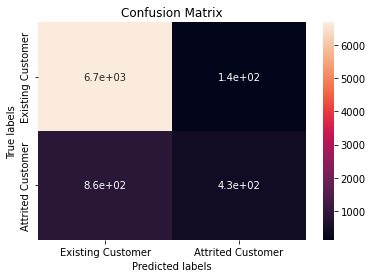

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Existing Customer', 'Attrited Customer']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1642   42]
 [ 229  113]]


[Text(0, 0.5, 'Existing Customer'), Text(0, 1.5, 'Attrited Customer')]

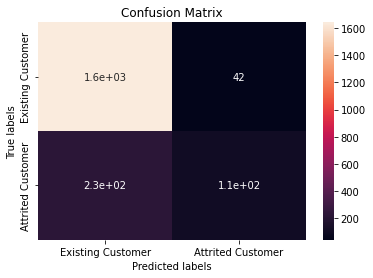

In [ ]:
# Get the confusion matrix for both train and test

labels =  ['Existing Customer', 'Attrited Customer']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, test_class_preds)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.13376110562685095
RMSE : 0.3657336539434824


In [ ]:
#R2 and R2 adjusted
from sklearn.metrics import r2_score
r2 = r2_score(y_test, test_class_preds)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,test_class_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.046675973385562064
Adjusted R2 :  0.04289481710746812


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
#cross validation 5 times
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.877, test=0.875) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.880, test=0.867) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ................ accuracy: (train=0.877, test=0.878) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] END ................ accuracy: (train=0.876, test=0.884) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] END ................ accuracy: (train=0.877, test=0.877) total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [ ]:
#accuarcy of train check at each 5 times
scores['train_accuracy']

array([0.87746914, 0.8796482 , 0.87717945, 0.87594507, 0.87748804])

In [ ]:
#accuarcy of test check at each 5 times
scores['test_accuracy']

array([0.87476866, 0.86728395, 0.87839506, 0.88395062, 0.87654321])

In [ ]:
#estimate
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
#coefficients and intercept
for model in scores['estimator']:
    print("model coefficent is :" ,model.coef_)
    print("model intercept is :",model.intercept_)

model coefficent is : [[ 7.59495614e-02 -5.39789093e-01  3.47171940e-01  4.47813273e-01
   3.76771435e-06 -8.89667291e-04 -2.99762811e-04 -7.14503760e-03]]
model intercept is : [0.02212222]
model coefficent is : [[ 1.37883650e-01 -5.25675805e-01  3.48560858e-01  4.24465063e-01
  -1.52282375e-06 -9.10175928e-04 -3.19349049e-04 -5.29447339e-03]]
model intercept is : [0.02199623]
model coefficent is : [[ 1.25354722e-01 -5.15883844e-01  3.33395277e-01  4.38860256e-01
  -2.37182452e-06 -9.11228759e-04 -3.22254797e-04 -7.78602400e-03]]
model intercept is : [0.02085144]
model coefficent is : [[ 6.59139472e-02 -4.84179944e-01  3.26711886e-01  4.47371669e-01
   1.38729516e-06 -8.88439584e-04 -3.20298395e-04 -1.25682839e-02]]
model intercept is : [-0.00094405]
model coefficent is : [[ 1.30034733e-01 -5.04083762e-01  3.01749654e-01  4.22416110e-01
   1.26447141e-06 -9.16156938e-04 -3.08868566e-04 -3.15212413e-03]]
model intercept is : [0.02089636]
